## Prueba 1 Simulacion
### Alumno: Andres Viscaino

In [208]:
import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
url = 'time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df = df.replace(np.nan, 0)
df=df.loc[df['Country/Region'] == 'Haiti']
df=df.iloc[0,62:]
df

3/20/20        2
3/21/20        2
3/22/20        2
3/23/20        6
3/24/20        7
            ... 
10/29/20    9057
10/30/20    9057
10/31/20    9057
11/1/20     9057
11/2/20     9057
Name: 138, Length: 228, dtype: object

### **MODELO LINEAL**


Coefficients: 
 [52.00751359]
Independent term: 
 -880.8603060514724


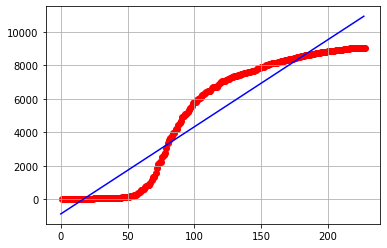

Casos en una semana:  10924.845278871535


In [210]:
y=list(df.iloc[:])
x=list(np.array(range(1,len(y)+1)))
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
plt.scatter(x, y,marker='o' ,c='red')
x_real = np.array(range(0,len(y)))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='blue')
prediccion=regr.predict(x_real.reshape(-1, 1))
plt.plot(227,prediccion[227],color='red')
plt.rcParams['figure.figsize'] = [9, 7]
plt.grid()
plt.show()
print("Casos en una semana: ",prediccion[227])

### **MODELO LOGISTICO**


(array([-9222.16740792,  3216.03007081]), array([[347782.05623737, -74775.94670429],
       [-74775.94670429,  16821.4099407 ]]))


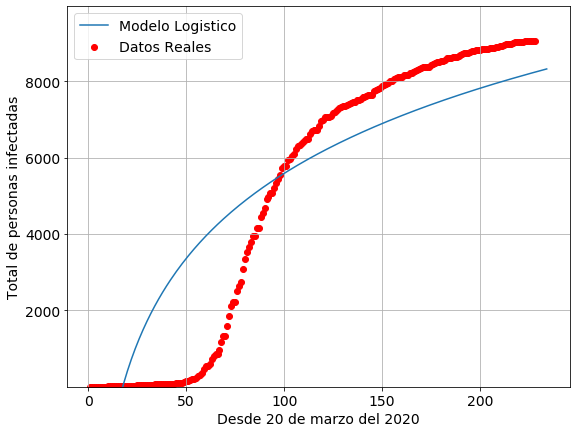

In [211]:
y=list(df.iloc[:])
x=list(np.array(range(1,len(y)+1)))

def modelo_logistico(x,a,b):
    return a+b*np.log(x)
exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [9, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde 20 de marzo del 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.4,max(y)*1.1)) # Definir los limites de Y
plt.grid()
plt.show()

### **MODELO EXPONECIAL**

[]

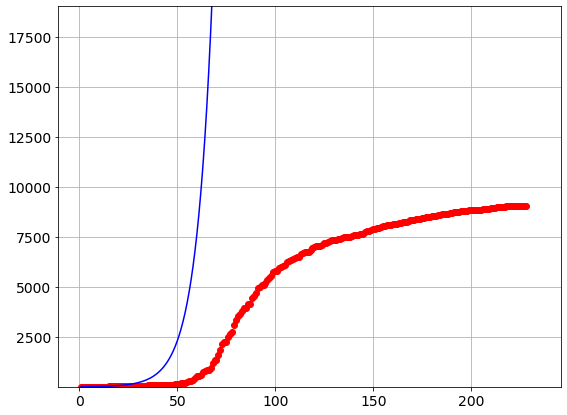

In [240]:
y=list(df.iloc[:])
x=list(np.array(range(1,len(y)+1)))
pred_x = np.array(list(range(min(x),max(x)+7)))
xd = np.log(x)
yd = np.log(y)
curve_fit = np.polyfit(x,yd, deg=1)
yx = np.exp(1.74) * np.exp(0.12*pred_x)
plt.plot(x, y, "ro")
plt.plot(pred_x, yx, color='blue')
plt.ylim((min(y)*0.9,max(y)*2.1)) # Definir los limites de Y
plt.grid(True)
plt.plot()


### **MODELO POLIMONIAL**

La prediccion para los 7 dias es 9135


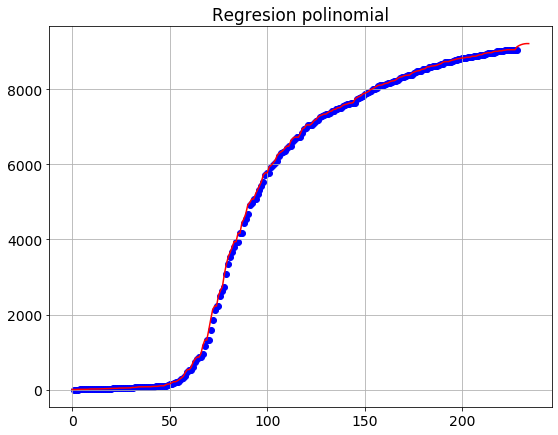

In [206]:
y=list(df.iloc[:])
y1=y[0:len(y)]
x1 = np.array(range(1,len(y)+1)).reshape(-1, 1)
lin = LinearRegression() 
lin.fit(x1, y1) 
poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(x1) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(x1, y1, color = 'blue') 
X1 =  np.array(range(len(y)-14,len(y)-7))
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
print('La prediccion para los 7 dias es',int(pre[6]))
pre=np.flip(pre)
for i in pre:
    y1.append(i)
x2=np.array(range(0,len(y1))) 
plt.plot(x2, y1, color = 'r')
plt.plot()
plt.title('Regresion polinomial') 
plt.grid()
plt.show() 


### **MODELO PROBABILISTICO**

6708.5
5074.0
Predicción en una semana:  9064


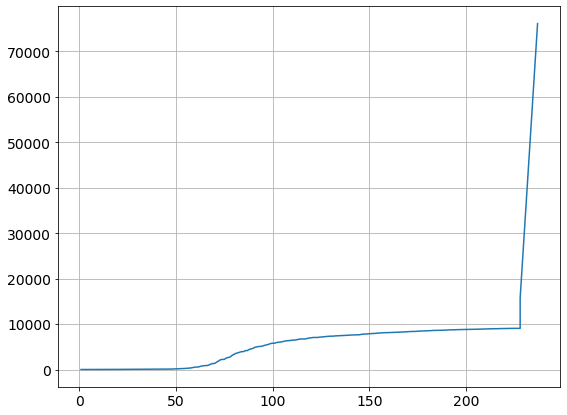

In [235]:
y_p=list(df.iloc[:])
x_p=list(np.array(range(1,len(y)+1)))
filtro=df.iloc [:]
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y_p[-1] + mediana)
for i in range(x_p[-1], x_p[-1]+10):
    x_p.append(i)
    y_p.append(int(y_p[-1] + mediana))
plt.plot(x_p, y_p)
plt.grid()
print('Predicción en una semana: ',y[-1]+7)
plt.show()

### Conclusiones
1.- Cual tiene una mejor prediccion

* Dentro de los modelos matemáticos que apreciamos en los apartados anteriores, distinguimos que el modelo de regresión polinomial es el que tiene mejor ajuste de datos, son los que presentan menor desviación estándar, simplifican el tratamiento de datos, permitiendo un análisis más riguroso de los resultados.

2.- Ventajas y desventajas de los modelos

**Modelos de regresión linal:**

Ventajas

* Fácil de entender y explicar
* Es rápido de modelar y es particularmente útil cuando la relación a modelar * no es extremadamente compleja y no tiene mucha información.
* Es menos propenso al sobreajuste

Desventajas

- No se puede modelar relaciones complejas.
- No se pueden capturar relaciones no lineales sin transformar la entrada, por - lo que tienes que trabajar duro para que se ajuste a funciones no lineales.
- Puede sufrir con valores atípicos.

**Modelo de regresión logístico**

Ventajas

- Es de utilidad para la investigación clí-nica y epidemiológica, modela la probabilidad de un evento en forma de factores de riesgos
- Permiten el análisis de los resultados en términos explicativos y predictivos.
- Es mejor cuando se utilizan atributos relacionados con la de salida

Desventajas

- Imposibilidad de resolver directamente problemas no lineales.
- La dependencia que muestra en las características. Ya que no es una herramienta útil para identificar las características más adecuadas.

**Modelo de regresión exponencial**

Ventajas

- Tiene la virtud de realizar aproximaciones a valores muy alto

Desventajas

- El modelo exponencial puede dejar de ser adecuado por los factores limitantes de crecimiento

**Modelo de regresión polinomial**

Ventajas

- Extiende el modelo lineal al agregar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia

Desventajas

- A medida que aumentamos la complejidad de la fórmula, el número de características también aumenta, lo que a veces es difícil de manejar.
- La Regresión Polinomial tiene una tendencia a ajustarse drásticamente, incluso es un simple conjunto de datos unidimensional. Si bien podamos tener una tentación de ajustar un polinomio de mayor grado para obtener un error menos, esto puede resultar en un ajuste excesivo, por esa razón siempre se debe trazar las relaciones para ver el ajuste y concentrarnos de que la curva se ajuste a la naturaleza del problema.

**Cual es el principal problema del modelo probabilistico**

El problema principal del modelo probabilisitico es que cuando son valores pequeños el modelo da una prediccion exacta o perfecta se podrai decir pero al momento de dar una gran cantodad de valores es modelo no da una prediccion optima